# **Entities and relationships: database schema discovery**

![](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

# ... Brouillon sur le cas de bureau

Remonter ici ce que j'ai fait pour P5 (analyse des relations entre tables)
faire mes fonctions v1 de table indexées nettoyée et mises en cache

In [8]:
from home_credit.load import load_raw_table

bureau = load_raw_table("bureau")
bureau.columns.name = "bureau"
display(bureau)

bureau_balance = load_raw_table("bureau_balance")
bureau_balance.columns.name = "bureau_balance"
display(bureau_balance)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt


bureau,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt


bureau_balance,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


Effectuer un merge n'est pas forcément une bonne idée :

In [9]:
import pandas as pd

sk_bur = bureau[bureau.columns[:2]]
display(sk_bur)
sk_bur_bal = bureau_balance[bureau_balance.columns[:1]]
display(sk_bur_bal)

sk_mrg = pd.merge(sk_bur_bal, sk_bur, how='outer', on='SK_ID_BUREAU')
display(sk_mrg)


bureau,SK_ID_CURR,SK_ID_BUREAU
0,215354,5714462
1,215354,5714463
2,215354,5714464
3,215354,5714465
4,215354,5714466
...,...,...
1716423,259355,5057750
1716424,100044,5057754
1716425,100044,5057762
1716426,246829,5057770


bureau_balance,SK_ID_BUREAU
0,5715448
1,5715448
2,5715448
3,5715448
4,5715448
...,...
27299920,5041336
27299921,5041336
27299922,5041336
27299923,5041336


,SK_ID_BUREAU,SK_ID_CURR
0,5715448,380361.0
1,5715448,380361.0
2,5715448,380361.0
3,5715448,380361.0
4,5715448,380361.0
...,...,...
28241994,5057750,259355.0
28241995,5057754,100044.0
28241996,5057762,100044.0
28241997,5057770,246829.0


In [10]:
display(sk_mrg[sk_mrg.SK_ID_CURR.isnull()])

,SK_ID_BUREAU,SK_ID_CURR
1220,5717409,NaN
1221,5717409,NaN
1222,5717409,NaN
1223,5717409,NaN
1224,5717409,NaN
...,...,...
27299794,5041143,NaN
27299795,5041143,NaN
27299796,5041143,NaN
27299797,5041143,NaN


In [12]:
display(bureau_balance)

bureau_balance,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [14]:
import pandas as pd

piv = bureau_balance.pivot(index='SK_ID_BUREAU', columns='MONTHS_BALANCE', values='STATUS')
display(piv)

MONTHS_BALANCE,-96,-95,-94,-93,-92,-91,-90,-89,-88,-87,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,
5001709,X,X,X,X,X,X,X,X,X,X,...,C,C,C,C,C,C,C,C,C,C
5001710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
6842885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,5,5,5,5,5,5,5
6842886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C


## `SK_ID_BUREAU`

`bureau` $\leftrightarrow$ `bureau_balance`

In [1]:
from home_credit.utils import help_cols
help_cols("SK_ID_BUREAU")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
bureau|SK_ID_BUREAU|Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)|hashed|
bureau_balance|SK_ID_BUREAU|Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table |hashed|

### Reminder

In [2]:
from home_credit.utils import get_table_with_reminder
bureau = get_table_with_reminder("bureau")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_CURR,1716428,305811,0,1.000,0.178,int64
SK_ID_BUREAU,1716428,1716428,0,1.000,1.000,int64
CREDIT_ACTIVE,1716428,4,0,1.000,0.000,object
CREDIT_CURRENCY,1716428,4,0,1.000,0.000,object
DAYS_CREDIT,1716428,2923,0,1.000,0.002,int64
CREDIT_DAY_OVERDUE,1716428,942,0,1.000,0.001,int64
DAYS_CREDIT_ENDDATE,1610875,14096,105553,0.939,0.009,float64
DAYS_ENDDATE_FACT,1082775,2917,633653,0.631,0.003,float64
AMT_CREDIT_MAX_OVERDUE,591940,68251,1124488,0.345,0.115,float64
CNT_CREDIT_PROLONG,1716428,10,0,1.000,0.000,int64



Column descriptions


Table|Column|Description|Special|
---|---|---|---|
bureau|SK_ID_CURR|ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau |hashed|
bureau|SK_ID_BUREAU|Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)|hashed|
bureau|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|_|
bureau|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded|
bureau|DAYS_CREDIT|How many days before current application did client apply for Credit Bureau credit|time only relative to the application|
bureau|CREDIT_DAY_OVERDUE|Number of days past due on CB credit at the time of application for related loan in our sample|_|
bureau|DAYS_CREDIT_ENDDATE|Remaining duration of CB credit (in days) at the time of application in Home Credit|time only relative to the application|
bureau|DAYS_ENDDATE_FACT|Days since CB credit ended at the time of application in Home Credit (only for closed credit)|time only relative to the application|
bureau|AMT_CREDIT_MAX_OVERDUE|Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)|_|
bureau|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|_|
bureau|AMT_CREDIT_SUM|Current credit amount for the Credit Bureau credit|_|
bureau|AMT_CREDIT_SUM_DEBT|Current debt on Credit Bureau credit|_|
bureau|AMT_CREDIT_SUM_LIMIT|Current credit limit of credit card reported in Credit Bureau|_|
bureau|AMT_CREDIT_SUM_OVERDUE|Current amount overdue on Credit Bureau credit|_|
bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|
bureau|DAYS_CREDIT_UPDATE|How many days before loan application did last information about the Credit Bureau credit come|time only relative to the application|
bureau|AMT_ANNUITY|Annuity of the Credit Bureau credit|_|
bureau_balance|SK_ID_BUREAU|Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table |hashed|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|

In [3]:
bureau_balance = get_table_with_reminder("bureau_balance")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_BUREAU,27299925,817395,0,1.000,0.030,int64
MONTHS_BALANCE,27299925,97,0,1.000,0.000,int64
STATUS,27299925,8,0,1.000,0.000,object



Column descriptions


Table|Column|Description|Special|
---|---|---|---|
bureau_balance|SK_ID_BUREAU|Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table |hashed|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|

### Free electrons

* 54.8 % des demandes de prêt (`SK_ID_BUREAU`) apparaissant dans `bureau` ne sont pas détaillées dans `bureau_balance`.
* 5.3 % des demandes de prêt détaillées dans `bureau_balance` ne sont pas enregsitrées dans `bureau`.

In [4]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(bureau, bureau_balance, 'SK_ID_BUREAU')

|bureau.SK_ID_BUREAU| : 1716428
|bureau_balance.SK_ID_BUREAU| : 817395
|bureau.SK_ID_BUREAU \ bureau_balance.SK_ID_BUREAU| : 942074 (54.886%)
|bureau_balance.SK_ID_BUREAU \ bureau.SK_ID_BUREAU| : 43041 (5.266%)


Observons cela de plus près :

In [5]:
from pepper.db_utils import out_of_intersection
_, _, only_in_b, only_in_bl = out_of_intersection(bureau, bureau_balance, 'SK_ID_BUREAU')

In [6]:
bureau_without_bureau_balance = bureau[bureau.SK_ID_BUREAU.isin(only_in_b)]
display(bureau_without_bureau_balance)

bureau,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.000,-153.000,NaN,0,91323.000,0.000,NaN,0.000,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.000,NaN,NaN,0,225000.000,171342.000,NaN,0.000,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.000,NaN,NaN,0,464323.500,NaN,NaN,0.000,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.000,NaN,NaN,0.000,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.000,NaN,77674.500,0,2700000.000,NaN,NaN,0.000,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.000,NaN,0.000,0,11250.000,11250.000,0.000,0.000,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.000,-2493.000,5476.500,0,38130.840,0.000,0.000,0.000,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.000,-970.000,NaN,0,15570.000,NaN,NaN,0.000,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.000,-1513.000,NaN,0,36000.000,0.000,0.000,0.000,Consumer credit,-1508,NaN


In [7]:
bureau_balance_without_bureau = bureau_balance[bureau_balance.SK_ID_BUREAU.isin(only_in_bl)]
display(bureau_balance_without_bureau)

bureau_balance,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
1220,5717409,-90,X
1221,5717409,-91,0
1222,5717409,-92,X
1223,5717409,-93,0
1224,5717409,-94,0
...,...,...,...
27299794,5041143,-92,0
27299795,5041143,-93,0
27299796,5041143,-94,0
27299797,5041143,-95,0


## `SK_ID_PREV`

1. `previous_application` $\leftrightarrow$ `pos_cash_balance`
2. `previous_application` $\leftrightarrow$ `credit_card_balance`
3. `previous_application` $\leftrightarrow$ `installments_payments`
4. `pos_cash_balance` $\leftrightarrow$ `credit_card_balance`
5. `pos_cash_balance` $\leftrightarrow$ `installments_payments`
6. `credit_card_balance` $\leftrightarrow$ `installments_payments`

In [8]:
from home_credit.utils import help_cols
help_cols("SK_ID_PREV")

Table|Column|Description|Special|
---|---|---|---|
pos_cash_balance|SK_ID_PREV|ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|_|
credit_card_balance|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
previous_application|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) |hashed|
installments_payments|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|

### Reminder

In [9]:
from home_credit.utils import get_table_with_reminder
previous_application = get_table_with_reminder("previous_application")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_PREV,1670214,1670214,0,1.000,1.000,int64
SK_ID_CURR,1670214,338857,0,1.000,0.203,int64
NAME_CONTRACT_TYPE,1670214,4,0,1.000,0.000,object
AMT_ANNUITY,1297979,357959,372235,0.777,0.276,float64
AMT_APPLICATION,1670214,93885,0,1.000,0.056,float64
AMT_CREDIT,1670213,86803,1,1.000,0.052,float64
AMT_DOWN_PAYMENT,774370,29278,895844,0.464,0.038,float64
AMT_GOODS_PRICE,1284699,93885,385515,0.769,0.073,float64
WEEKDAY_APPR_PROCESS_START,1670214,7,0,1.000,0.000,object
HOUR_APPR_PROCESS_START,1670214,24,0,1.000,0.000,int64



Column descriptions


Table|Column|Description|Special|
---|---|---|---|
previous_application|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) |hashed|
previous_application|SK_ID_CURR|ID of loan in our sample|hashed|
previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
previous_application|AMT_ANNUITY|Annuity of previous application|_|
previous_application|AMT_APPLICATION|For how much credit did client ask on the previous application|_|
previous_application|AMT_CREDIT|Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT|_|
previous_application|AMT_DOWN_PAYMENT|Down payment on the previous application|_|
previous_application|AMT_GOODS_PRICE|Goods price of good that client asked for (if applicable) on the previous application|_|
previous_application|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|_|
previous_application|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|
previous_application|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|_|
previous_application|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|_|
previous_application|NFLAG_MICRO_CASH|Flag Micro finance loan|_|
previous_application|RATE_DOWN_PAYMENT|Down payment rate normalized on previous credit|normalized|
previous_application|RATE_INTEREST_PRIMARY|Interest rate normalized on previous credit|normalized|
previous_application|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized|
previous_application|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|_|
previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|
previous_application|DAYS_DECISION|Relative to current application when was the decision about previous application made|time only relative to the application|
previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
previous_application|CODE_REJECT_REASON|Why was the previous application rejected|_|
previous_application|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|_|
previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
previous_application|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|_|
previous_application|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, �|_|
previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|
previous_application|SELLERPLACE_AREA|Selling area of seller place of the previous application|_|
previous_application|NAME_SELLER_INDUSTRY|The industry of the seller|_|
previous_application|CNT_PAYMENT|Term of previous credit at application of the previous application|_|
previous_application|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped|
previous_application|PRODUCT_COMBINATION|Detailed product combination of the previous application|_|
previous_application|DAYS_FIRST_DRAWING|Relative to application date of current application when was the first disbursement of the previous application|time only relative to the application|
previous_application|DAYS_FIRST_DUE|Relative to application date of current application when was the first due supposed to be of the previous application|time only relative to the application|
previous_application|DAYS_LAST_DUE_1ST_VERSION|Relative to application date of current application when was the first due of the previous application|time only relative to the application|
previous_application|DAYS_LAST_DUE|Relative to application date of current application when was the last due date of the previous application|time only relative to the application|
previous_application|DAYS_TERMINATION|Relative to application date of current application when was the expected termination of the previous application|time only relative to the application|
previous_application|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|_|

In [10]:
pos_cash_balance = get_table_with_reminder("pos_cash_balance")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_PREV,10001358,936325,0,1.000,0.094,int64
SK_ID_CURR,10001358,337252,0,1.000,0.034,int64
MONTHS_BALANCE,10001358,96,0,1.000,0.000,int64
CNT_INSTALMENT,9975287,73,26071,0.997,0.000,float64
CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997,0.000,float64
NAME_CONTRACT_STATUS,10001358,9,0,1.000,0.000,object
SK_DPD,10001358,3400,0,1.000,0.000,int64
SK_DPD_DEF,10001358,2307,0,1.000,0.000,int64



Column descriptions


Table|Column|Description|Special|
---|---|---|---|
pos_cash_balance|SK_ID_PREV|ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|_|
pos_cash_balance|SK_ID_CURR|ID of loan in our sample|_|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|
pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
pos_cash_balance|SK_DPD|DPD (days past due) during the month of previous credit|_|
pos_cash_balance|SK_DPD_DEF|DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|_|

In [11]:
credit_card_balance = get_table_with_reminder("credit_card_balance")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_PREV,3840312,104307,0,1.000,0.027,int64
SK_ID_CURR,3840312,103558,0,1.000,0.027,int64
MONTHS_BALANCE,3840312,96,0,1.000,0.000,int64
AMT_BALANCE,3840312,1347904,0,1.000,0.351,float64
AMT_CREDIT_LIMIT_ACTUAL,3840312,181,0,1.000,0.000,int64
AMT_DRAWINGS_ATM_CURRENT,3090496,2267,749816,0.805,0.001,float64
AMT_DRAWINGS_CURRENT,3840312,187005,0,1.000,0.049,float64
AMT_DRAWINGS_OTHER_CURRENT,3090496,1832,749816,0.805,0.001,float64
AMT_DRAWINGS_POS_CURRENT,3090496,168748,749816,0.805,0.055,float64
AMT_INST_MIN_REGULARITY,3535076,312266,305236,0.921,0.088,float64



Column descriptions


Table|Column|Description|Special|
---|---|---|---|
credit_card_balance|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
credit_card_balance|SK_ID_CURR|ID of loan in our sample|hashed|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
credit_card_balance|AMT_BALANCE|Balance during the month of previous credit|_|
credit_card_balance|AMT_CREDIT_LIMIT_ACTUAL|Credit card limit during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_ATM_CURRENT|Amount drawing at ATM during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_CURRENT|Amount drawing during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_OTHER_CURRENT|Amount of other drawings during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_POS_CURRENT|Amount drawing or buying goods during the month of the previous credit|_|
credit_card_balance|AMT_INST_MIN_REGULARITY|Minimal installment for this month of the previous credit|_|
credit_card_balance|AMT_PAYMENT_CURRENT|How much did the client pay during the month on the previous credit|_|
credit_card_balance|AMT_PAYMENT_TOTAL_CURRENT|How much did the client pay during the month in total on the previous credit|_|
credit_card_balance|AMT_RECEIVABLE_PRINCIPAL|Amount receivable for principal on the previous credit|_|
credit_card_balance|AMT_RECIVABLE|Amount receivable on the previous credit|_|
credit_card_balance|AMT_TOTAL_RECEIVABLE|Total amount receivable on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_CURRENT|Number of drawings during this month on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_POS_CURRENT|Number of drawings for goods during this month on the previous credit|_|
credit_card_balance|CNT_INSTALMENT_MATURE_CUM|Number of paid installments on the previous credit|_|
credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
credit_card_balance|SK_DPD|DPD (Days past due) during the month on the previous credit|_|
credit_card_balance|SK_DPD_DEF|DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|_|

In [12]:
installments_payments = get_table_with_reminder("installments_payments")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_PREV,13605401,997752,0,1.000,0.073,int64
SK_ID_CURR,13605401,339587,0,1.000,0.025,int64
NUM_INSTALMENT_VERSION,13605401,65,0,1.000,0.000,float64
NUM_INSTALMENT_NUMBER,13605401,277,0,1.000,0.000,int64
DAYS_INSTALMENT,13605401,2922,0,1.000,0.000,float64
DAYS_ENTRY_PAYMENT,13602496,3039,2905,1.000,0.000,float64
AMT_INSTALMENT,13605401,902539,0,1.000,0.066,float64
AMT_PAYMENT,13602496,944235,2905,1.000,0.069,float64



Column descriptions


Table|Column|Description|Special|
---|---|---|---|
installments_payments|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
installments_payments|SK_ID_CURR|ID of loan in our sample|hashed|
installments_payments|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|_|
installments_payments|NUM_INSTALMENT_NUMBER|On which installment we observe payment|_|
installments_payments|DAYS_INSTALMENT|When the installment of previous credit was supposed to be paid (relative to application date of current loan)|time only relative to the application|
installments_payments|DAYS_ENTRY_PAYMENT|When was the installments of previous credit paid actually (relative to application date of current loan)|time only relative to the application|
installments_payments|AMT_INSTALMENT|What was the prescribed installment amount of previous credit on this installment|_|
installments_payments|AMT_PAYMENT|What the client actually paid on previous credit on this installment|_|

### Free electrons

#### 1\. `previous_application` $\leftrightarrow$ `pos_cash_balance`

In [13]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(previous_application, pos_cash_balance, "SK_ID_PREV")

|previous_application.SK_ID_PREV| : 1670214
|pos_cash_balance.SK_ID_PREV| : 936325
|previous_application.SK_ID_PREV \ pos_cash_balance.SK_ID_PREV| : 771311 (46.18%)
|pos_cash_balance.SK_ID_PREV \ previous_application.SK_ID_PREV| : 37422 (3.997%)


#### 2\. `previous_application` $\leftrightarrow$ `credit_card_balance`

In [14]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(previous_application, credit_card_balance, "SK_ID_PREV")

|previous_application.SK_ID_PREV| : 1670214
|credit_card_balance.SK_ID_PREV| : 104307
|previous_application.SK_ID_PREV \ credit_card_balance.SK_ID_PREV| : 1577279 (94.436%)
|credit_card_balance.SK_ID_PREV \ previous_application.SK_ID_PREV| : 11372 (10.902%)


#### 3\. `previous_application` $\leftrightarrow$ `installments_payments`

In [15]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(previous_application, installments_payments, "SK_ID_PREV")

|previous_application.SK_ID_PREV| : 1670214
|installments_payments.SK_ID_PREV| : 997752
|previous_application.SK_ID_PREV \ installments_payments.SK_ID_PREV| : 711309 (42.588%)
|installments_payments.SK_ID_PREV \ previous_application.SK_ID_PREV| : 38847 (3.893%)


#### 4\. `pos_cash_balance` $\leftrightarrow$ `credit_card_balance`

Exclusion mutuelle.

In [16]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(pos_cash_balance, credit_card_balance, "SK_ID_PREV")

|pos_cash_balance.SK_ID_PREV| : 936325
|credit_card_balance.SK_ID_PREV| : 104307
|pos_cash_balance.SK_ID_PREV \ credit_card_balance.SK_ID_PREV| : 936325 (100.0%)
|credit_card_balance.SK_ID_PREV \ pos_cash_balance.SK_ID_PREV| : 104307 (100.0%)


#### 5\. `pos_cash_balance` $\leftrightarrow$ `installments_payments`

In [17]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(pos_cash_balance, installments_payments, "SK_ID_PREV")

|pos_cash_balance.SK_ID_PREV| : 936325
|installments_payments.SK_ID_PREV| : 997752
|pos_cash_balance.SK_ID_PREV \ installments_payments.SK_ID_PREV| : 11376 (1.215%)
|installments_payments.SK_ID_PREV \ pos_cash_balance.SK_ID_PREV| : 72803 (7.297%)


#### 6\. `credit_card_balance` $\leftrightarrow$ `installments_payments`

In [18]:
from pepper.db_utils import print_out_of_intersection
print_out_of_intersection(credit_card_balance, installments_payments, "SK_ID_PREV")

|credit_card_balance.SK_ID_PREV| : 104307
|installments_payments.SK_ID_PREV| : 997752
|credit_card_balance.SK_ID_PREV \ installments_payments.SK_ID_PREV| : 31841 (30.526%)
|installments_payments.SK_ID_PREV \ credit_card_balance.SK_ID_PREV| : 925286 (92.737%)


## `SK_ID_CURR`

In [19]:
from home_credit.utils import help_cols
help_cols("SK_ID_CURR")

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|SK_ID_CURR|ID of loan in our sample|_|
bureau|SK_ID_CURR|ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau |hashed|
pos_cash_balance|SK_ID_CURR|ID of loan in our sample|_|
credit_card_balance|SK_ID_CURR|ID of loan in our sample|hashed|
previous_application|SK_ID_CURR|ID of loan in our sample|hashed|
installments_payments|SK_ID_CURR|ID of loan in our sample|hashed|

En fait, c'est malin, plutôt que d'aligner a posteriori, de coupler application train et test en une seule table.

C'est la première table dérivée : mais pb : démultiplication de l'espace mémoire utilisé.

Il faut donc se donner les moyen de la charger directement.

A faire lorsque je me suis assuré que l'intersection est vide.

In [20]:
from home_credit.utils import get_table_with_reminder
application_train = get_table_with_reminder("application_train")

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt

Discrete stats


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_CURR,307511,307511,0,1.000,1.000,int64
TARGET,307511,2,0,1.000,0.000,int64
NAME_CONTRACT_TYPE,307511,2,0,1.000,0.000,object
CODE_GENDER,307511,3,0,1.000,0.000,object
FLAG_OWN_CAR,307511,2,0,1.000,0.000,object
...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.865,0.000,float64
AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.865,0.000,float64
AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.865,0.000,float64
AMT_REQ_CREDIT_BUREAU_QRT,265992,11,41519,0.865,0.000,float64



Column descriptions


Table|Column|Description|Special|
---|---|---|---|


In [21]:
display(application_train)

application_train,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.000,254700.000,27558.000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.000,269550.000,12001.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.000,677664.000,29979.000,...,0,0,0,0,1.000,0.000,0.000,1.000,0.000,1.000
307509,456254,1,Cash loans,F,N,Y,0,171000.000,370107.000,20205.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


### Chargement des 7 tables

In [24]:
from home_credit.utils import get_table
table_names = [
    "application_train", "application_test", "bureau", "pos_cash_balance",
    "credit_card_balance", "previous_application", "installments_payments"
]

table_dict = {
    table_name: get_table(table_name)
    for table_name in table_names
}

for k, v in table_dict.items():
    print(f"{k}: {v.shape}")

application_train: (307511, 122)
application_test: (48744, 121)
bureau: (1716428, 17)
pos_cash_balance: (10001358, 8)
credit_card_balance: (3840312, 23)
previous_application: (1670214, 37)
installments_payments: (13605401, 8)


### Relations

Important : on confirme qu'il n'y a pas d'ID commun entre `application_train` et `application_test`, ce qui nous permet d'envisager sans risque une table `application` intégrée.

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt
save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_curr_relationship__is_in_a_but_not_in_b_2023_04_14_18_14_07_500748.png)


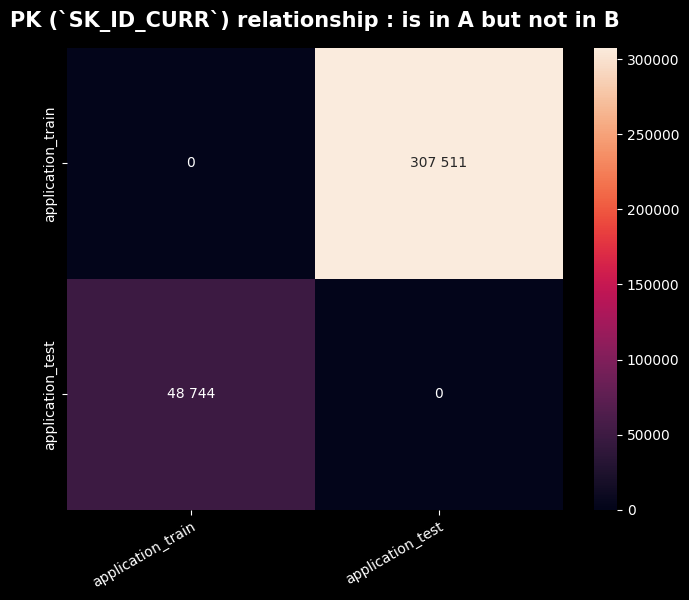

save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_curr_relationship__is_in_a_but_not_in_b_2023_04_14_18_14_08_219860.png)


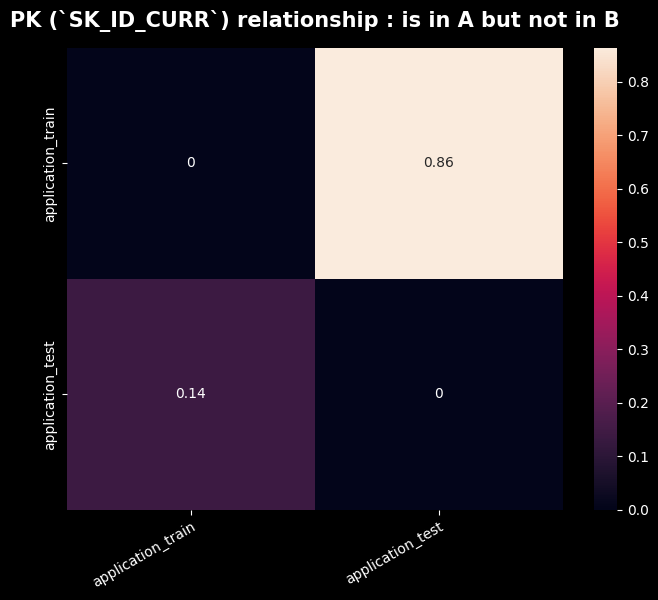

In [3]:
from home_credit.utils import get_table
from home_credit.load import get_var_descs
from pepper.db_utils import display_is_in_A_but_not_in_B_heatmap

key = "SK_ID_CURR"
table_names = ["application_train", "application_test"]
table_dict = {
    table_name: get_table(table_name)
    for table_name in table_names
}

_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key)
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key, True)

In [23]:
from pepper.utils import print_subtitle
from pepper.db_utils import print_out_of_intersection

k = 0
while len(table_dict) > 0:
    t_a_name, t_a = table_dict.popitem()
    for t_b_name, t_b in table_dict.items():
        k += 1
        print_subtitle(f"{k}. {t_a_name} ⟺ {t_b_name}")
        print_out_of_intersection(t_a, t_b, "SK_ID_CURR")


1. installments_payments ⟺ application_train
|installments_payments.SK_ID_CURR| : 339587
|application_train.SK_ID_CURR| : 307511
|installments_payments.SK_ID_CURR \ application_train.SK_ID_CURR| : 47944 (14.118%)
|application_train.SK_ID_CURR \ installments_payments.SK_ID_CURR| : 15868 (5.16%)

2. installments_payments ⟺ application_test
|installments_payments.SK_ID_CURR| : 339587
|application_test.SK_ID_CURR| : 48744
|installments_payments.SK_ID_CURR \ application_test.SK_ID_CURR| : 291643 (85.882%)
|application_test.SK_ID_CURR \ installments_payments.SK_ID_CURR| : 800 (1.641%)

3. installments_payments ⟺ bureau
|installments_payments.SK_ID_CURR| : 339587
|bureau.SK_ID_CURR| : 305811
|installments_payments.SK_ID_CURR \ bureau.SK_ID_CURR| : 47883 (14.1%)
|bureau.SK_ID_CURR \ installments_payments.SK_ID_CURR| : 14107 (4.613%)

4. installments_payments ⟺ pos_cash_balance
|installments_payments.SK_ID_CURR| : 339587
|pos_cash_balance.SK_ID_CURR| : 337252
|installments_payments.SK_ID_CURR 

### Version intégrée, avec table `application` intégrée

On distingue ainsi nettement que :
1. toute occurrence d'une `SK_ID_CURR` dans une quelconque des tables périphériques est également présente dans la table `application` (absence d'électrons libres tels qu'on en trouve sur de nombreux jeux de données) et qui viennent perturber les stratégies de jointure si l'on n'y prend garde.
2. $70\,\%$ environ des clients n'ont pas de carte de crédit.
3. $14\,\%$ des clients ne sont pas suivi par le bureau, mais quasiment tous ceux qui ont une carte de crédit.

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt
save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_curr_relationship__is_in_a_but_not_in_b_2023_04_14_18_07_06_520097.png)


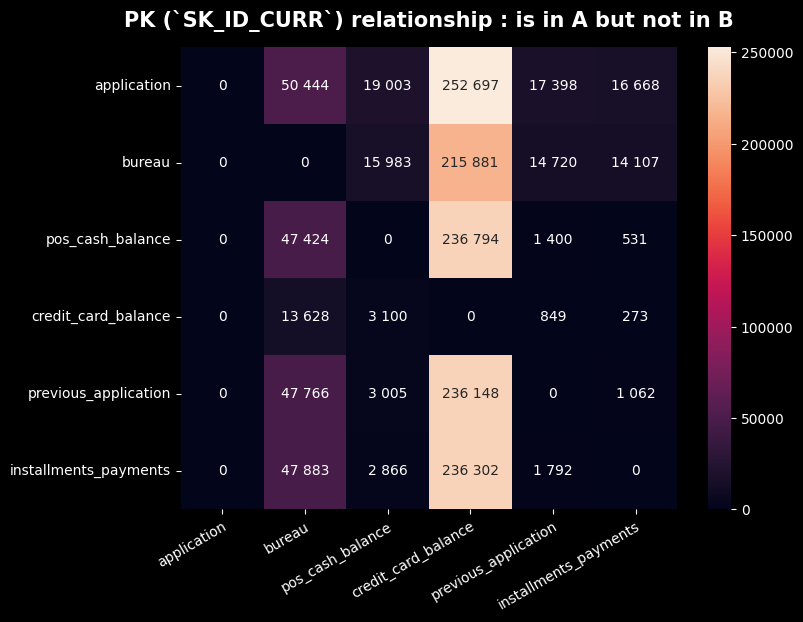

save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_curr_relationship__is_in_a_but_not_in_b_2023_04_14_18_07_10_030437.png)


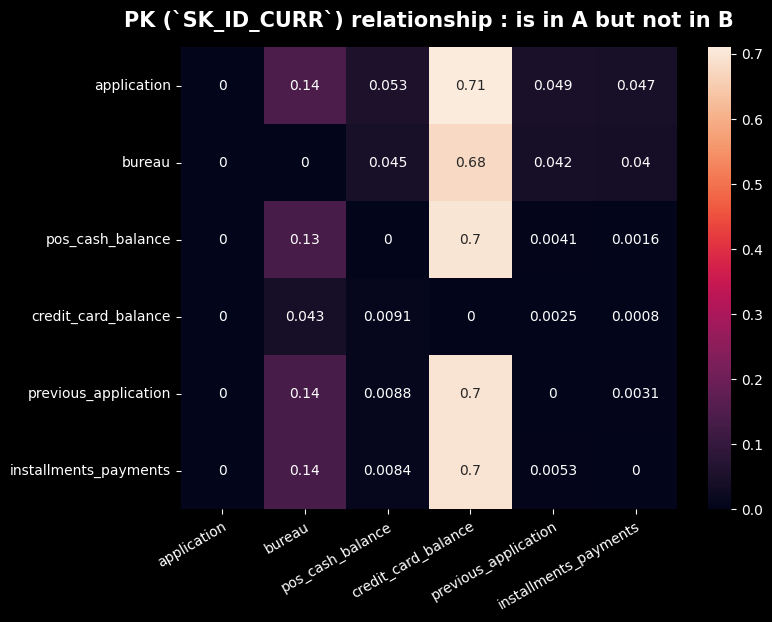

In [1]:
from home_credit.utils import get_table
from home_credit.load import get_var_descs
from pepper.db_utils import display_is_in_A_but_not_in_B_heatmap

key = "SK_ID_CURR"
var_descs = get_var_descs()
table_names = var_descs[var_descs.Column == key].Table
table_dict = {
    table_name: get_table(table_name)
    for table_name in table_names.values
}

_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key)
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key, True)